In [131]:
# LSTM for Inflation of Indonesian problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn .metrics import accuracy_score

In [132]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [133]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('Dataset1.csv', usecols=[1], engine='python', skipfooter=1)
dataset = dataframe.values
dataset = dataset.astype('float32') 
print(dataframe)

       X(t)
0    128.22
1    128.33
2    128.83
3    129.72
4    130.00
5    129.91
6    130.08
7    130.09
8    130.35
9    131.28
10   123.62
11   123.51
12   123.75
13   123.19
14   123.48
15   124.29
16   125.15
17   125.13
18   125.41
19   125.59
20   126.18
21   126.71
22   118.71
23   118.28
24   118.48
25   118.91
26   119.50
27   120.14
28   121.26
29   121.73
..      ...
123  148.92
124  149.99
125  151.11
126  152.32
127  153.53
128  153.81
129  155.50
130  138.72
131  139.53
132  139.57
133  139.64
134  140.16
135  140.79
136  141.42
137  141.88
138  142.42
139  143.65
140  144.14
141  145.89
142  118.53
143  118.33
144  120.59
145  121.00
146  121.25
147  121.86
148  122.81
149  123.48
150  124.33
151  135.15
152  136.92

[153 rows x 1 columns]


In [134]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset)

[[0.33636189]
 [0.33840156]
 [0.34767294]
 [0.3641758 ]
 [0.3693676 ]
 [0.3676989 ]
 [0.37085104]
 [0.37103653]
 [0.3758576 ]
 [0.39310217]
 [0.2510662 ]
 [0.24902654]
 [0.25347662]
 [0.24309278]
 [0.2484703 ]
 [0.26348972]
 [0.27943635]
 [0.27906537]
 [0.2842574 ]
 [0.2875948 ]
 [0.2985351 ]
 [0.30836272]
 [0.16002226]
 [0.15204883]
 [0.15575743]
 [0.16373086]
 [0.1746707 ]
 [0.18653798]
 [0.20730567]
 [0.21602082]
 [0.21490812]
 [0.21305394]
 [0.21768951]
 [0.23938417]
 [0.0168736 ]
 [0.02225089]
 [0.02391982]
 [0.02354884]
 [0.0268867 ]
 [0.03578711]
 [0.05507135]
 [0.06489897]
 [0.070647  ]
 [0.08047462]
 [0.11236787]
 [0.16539955]
 [0.4969406 ]
 [0.5160394 ]
 [0.53217125]
 [0.52957535]
 [0.52883387]
 [0.5553496 ]
 [0.64064527]
 [0.67068434]
 [0.6612277 ]
 [0.6636379 ]
 [0.66679025]
 [0.6816242 ]
 [0.38605595]
 [0.38716865]
 [0.38883734]
 [0.3938439 ]
 [0.39551282]
 [0.4107175 ]
 [0.4279623 ]
 [0.45151114]
 [0.4518819 ]
 [0.45596147]
 [0.45763016]
 [0.47116637]
 [0.30057478]
 [0.30

In [135]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(train_size)
print(test_size)

122
31


In [136]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [137]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [138]:
# create and fit the LSTM network
# Initialising the RNN
# Regression is when you predict a continuous value
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))

# Adding the output layer
# 'units = 1' because Output layer has one dimension
model.add(Dense(1))

# Compiling the RNN
# Keras documentation recommends 'RMSprop' as a good optimizer for RNNs
# Trial and error suggests that 'adam' optimizer is a good choice
# loss = 'mean_squared_error' which is good for Regression vs. 'Binary Cross Entropy' previously used for Classification
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 0.1197
Epoch 2/100
 - 0s - loss: 0.0654
Epoch 3/100
 - 0s - loss: 0.0477
Epoch 4/100
 - 0s - loss: 0.0437
Epoch 5/100
 - 0s - loss: 0.0413
Epoch 6/100
 - 0s - loss: 0.0393
Epoch 7/100
 - 0s - loss: 0.0378
Epoch 8/100
 - 0s - loss: 0.0361
Epoch 9/100
 - 0s - loss: 0.0347
Epoch 10/100
 - 0s - loss: 0.0331
Epoch 11/100
 - 0s - loss: 0.0319
Epoch 12/100
 - 0s - loss: 0.0303
Epoch 13/100
 - 0s - loss: 0.0293
Epoch 14/100
 - 0s - loss: 0.0284
Epoch 15/100
 - 0s - loss: 0.0273
Epoch 16/100
 - 0s - loss: 0.0264
Epoch 17/100
 - 0s - loss: 0.0255
Epoch 18/100
 - 0s - loss: 0.0250
Epoch 19/100
 - 0s - loss: 0.0244
Epoch 20/100
 - 0s - loss: 0.0238
Epoch 21/100
 - 0s - loss: 0.0232
Epoch 22/100
 - 0s - loss: 0.0230
Epoch 23/100
 - 0s - loss: 0.0227
Epoch 24/100
 - 0s - loss: 0.0223
Epoch 25/100
 - 0s - loss: 0.0221
Epoch 26/100
 - 0s - loss: 0.0216
Epoch 27/100
 - 0s - loss: 0.0214
Epoch 28/100
 - 0s - loss: 0.0211
Epoch 29/100
 - 0s - loss: 0.0211
Epoch 30/100
 - 0s - lo

In [139]:
# make prediction
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [140]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [141]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 7.14 RMSE
Test Score: 7.05 RMSE


In [142]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
print(trainPredict)

[[128.34268 ]
 [129.15082 ]
 [129.4052  ]
 [129.16904 ]
 [129.23839 ]
 [129.29109 ]
 [129.47556 ]
 [130.30081 ]
 [123.86423 ]
 [122.56863 ]
 [124.263504]
 [123.8364  ]
 [123.9608  ]
 [124.811676]
 [125.60988 ]
 [125.54698 ]
 [125.6083  ]
 [125.80671 ]
 [126.28194 ]
 [126.78395 ]
 [119.91019 ]
 [118.43864 ]
 [119.959984]
 [120.43299 ]
 [120.96062 ]
 [121.51137 ]
 [122.45388 ]
 [122.89188 ]
 [122.68832 ]
 [122.50343 ]
 [122.7164  ]
 [123.779945]
 [113.79953 ]
 [112.50755 ]
 [114.42474 ]
 [114.37189 ]
 [114.50228 ]
 [114.921936]
 [115.8125  ]
 [116.30422 ]
 [116.45421 ]
 [116.84772 ]
 [118.31576 ]
 [120.90481 ]
 [136.62029 ]
 [139.57361 ]
 [135.99646 ]
 [135.74287 ]
 [135.47047 ]
 [136.66075 ]
 [140.55504 ]
 [142.0783  ]
 [140.64525 ]
 [140.23624 ]
 [140.52335 ]
 [141.1255  ]
 [128.5779  ]
 [126.38494 ]
 [130.00754 ]
 [130.23547 ]
 [130.32939 ]
 [130.97409 ]
 [131.85555 ]
 [132.86334 ]
 [132.8378  ]
 [132.71956 ]
 [132.82079 ]
 [133.38809 ]
 [125.768585]
 [124.52946 ]
 [126.10825 ]
 [125.

In [143]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
print(testPredict)

[[143.14091]
 [144.01907]
 [144.75352]
 [145.47244]
 [145.48267]
 [146.38176]
 [134.01065]
 [132.0545 ]
 [136.39717]
 [136.25192]
 [136.67123]
 [137.23271]
 [137.6903 ]
 [137.9801 ]
 [138.30757]
 [139.23328]
 [139.64273]
 [140.74307]
 [118.96345]
 [115.49905]
 [121.81087]
 [122.51534]
 [122.35476]
 [122.83634]
 [123.69293]
 [124.28455]
 [124.92318]]


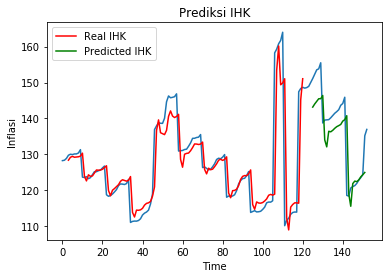

In [152]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, color = 'red', label = 'Real IHK')
plt.plot(testPredictPlot, color = 'green', label = 'Predicted IHK')
plt.title('Prediksi IHK')
plt.xlabel('Time')
plt.ylabel('Inflasi')
plt.legend()
plt.show()